# Using KMeans to cartoonize an image

### Imports

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

## Functions to cartoonize an image

In [37]:
# Function to obtain the format of an image
def get_image_format(file_path):
    _, file_extension = os.path.splitext(file_path)
    image_formats = {
        '.jpg': 'JPEG',
        '.jpeg': 'JPEG',
        '.png': 'PNG',
        '.gif': 'GIF',
        '.bmp': 'BMP',
        # can add more if needed
    }

    return image_formats.get(file_extension.lower(), 'Unknown')

In [48]:
# Function to obtain the file name of an image (NB: The file name includes the file extension)
def get_image_name(file_path):
    return os.path.basename(file_path)

In [54]:
# Function that uses k colors to cartoonize an image and saves the cartoonized image in a new file with the same file extension
def cartoonize_image(img_path, k):
    
    # get the file format of the image
    img_format = get_image_format(img_path)

    if img_format == 'Unknown':
        print('Unknown image format')
        return 'Unknown image format'
    else:
        # get the file name of the image
        img_name = get_image_name(img_path)
        
        # read the image file
        img = plt.imread(img_path, format= img_format)
    
        # prepare image data and apply KMeans
        img_flat = img.reshape(img.shape[0]*img.shape[1],3)
        kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
        img_flat2 = img_flat.copy()
    
        # loop for each cluster center
        for i in np.unique(kmeans.labels_):
            img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
    
        # reshape back to original shape
        img2 = img_flat2.reshape(img.shape)
    
        # display cartoonized image
        plt.imshow(img2)
        plt.axis('off');
    
        # save image to file
        plt.imsave(f'new_images/cartoon_{k}colors_{img_name}', img2)

## Display the original image

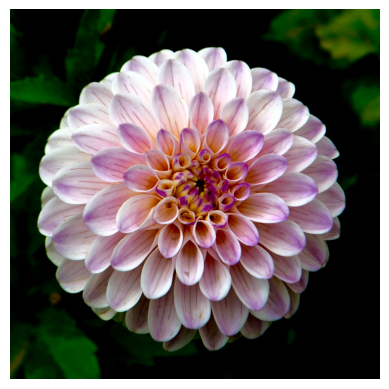

In [40]:
img = plt.imread('original_images/pink_flower.jpg', format='jpeg')
plt.imshow(img)
plt.axis('off');

## Display cartoonized image

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


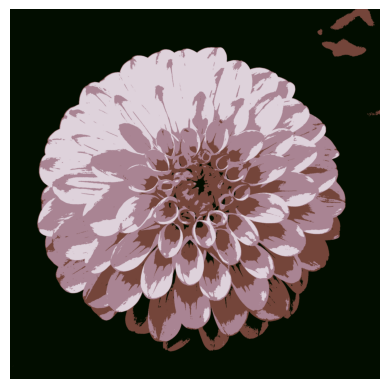

In [55]:
# call function on an image, specifying 8 clusters/colors
cartoonize_image('original_images/pink_flower.jpg', 16)